In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [103]:
data = pd.read_csv('../data/final2_merged_drought_temp.csv')

In [106]:
data.head()

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d4,DSCI,total_area,total_population,climate_regions,avg_tmax,avg_tmin,total_avg_prcp_inches,temp_id,total_avg_prcp_mm
1,2020-12-28,Alabama,AL,39068.95,12535.39,0.0,0.0,0.0,0.0,4038013.82,...,0.0,24,51604.34,4779736.02,Southeast,57.797143,30.522857,1.440,98,36.5760
2,2020-12-21,Alabama,AL,39068.95,12535.40,0.0,0.0,0.0,0.0,4038013.43,...,0.0,24,51604.35,4779736.02,Southeast,53.634286,34.314286,0.354,98,8.9916
3,2020-12-14,Alabama,AL,42812.87,8791.48,0.0,0.0,0.0,0.0,4239664.15,...,0.0,17,51604.35,4779736.02,Southeast,64.145714,38.808571,1.236,98,31.3944
4,2020-12-07,Alabama,AL,45608.51,5995.84,0.0,0.0,0.0,0.0,4483976.48,...,0.0,12,51604.35,4779736.02,Southeast,55.377143,31.965714,0.852,98,21.6408
5,2020-11-30,Alabama,AL,42750.86,8853.49,0.0,0.0,0.0,0.0,4181999.46,...,0.0,17,51604.35,4779736.03,Southeast,64.227857,44.435000,2.222,98,56.4388


In [105]:
#dropping december week
indexNames = data[ data['ValidEnd'] == '2021-01-04' ].index
data.drop(indexNames , inplace=True)


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47025 entries, 0 to 47024
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ValidEnd               47025 non-null  object 
 1   Name                   47025 non-null  object 
 2   state                  47025 non-null  object 
 3   area_none              47025 non-null  float64
 4   area_d0                47025 non-null  float64
 5   area_d1                47025 non-null  float64
 6   area_d2                47025 non-null  float64
 7   area_d3                47025 non-null  float64
 8   area_d4                47025 non-null  float64
 9   population_none        47025 non-null  float64
 10  population_d0          47025 non-null  float64
 11  population_d1          47025 non-null  float64
 12  population_d2          47025 non-null  float64
 13  population_d3          47025 non-null  float64
 14  population_d4          47025 non-null  float64
 15  DS

In [107]:
data.shape

(46980, 24)

In [108]:
#change the format of the time of the regions
data['ValidEnd']= pd.to_datetime(data['ValidEnd'])
data['ValidEnd'] = data['ValidEnd'].dt.strftime('%m/%d/%Y')
data['ValidEnd']=data['ValidEnd'].astype('datetime64[ns]')

## graphics of the Climate regions 

In [110]:
data.groupby(data['climate_regions'])['DSCI'].mean()

climate_regions
Northeast                       36.195163
Northern Rockies and Plains    105.121073
Northwest                      111.024904
Ohio Valley                     36.665572
South                           85.607120
Southeast                       78.231960
Southwest                      162.314416
Upper Midwest                   49.033285
West                           166.890805
Name: DSCI, dtype: float64

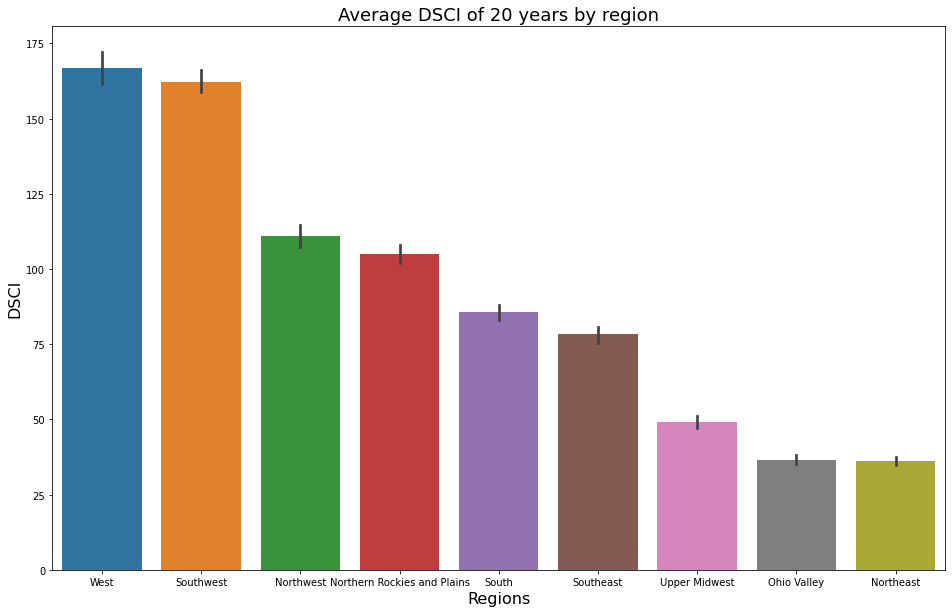

In [170]:
order= data.groupby(data['climate_regions'])['DSCI'].mean().sort_values().iloc[::-1].index
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='climate_regions',
    y='DSCI',
    data=data,order=order);
plt.title('Average DSCI of 20 years by region',fontdict={'fontsize':18});
plt.xlabel('Regions',fontdict={'fontsize':16});
plt.ylabel('DSCI',fontdict={'fontsize':16});
plt.savefig('../images/Average_DSCI_of_20.png')

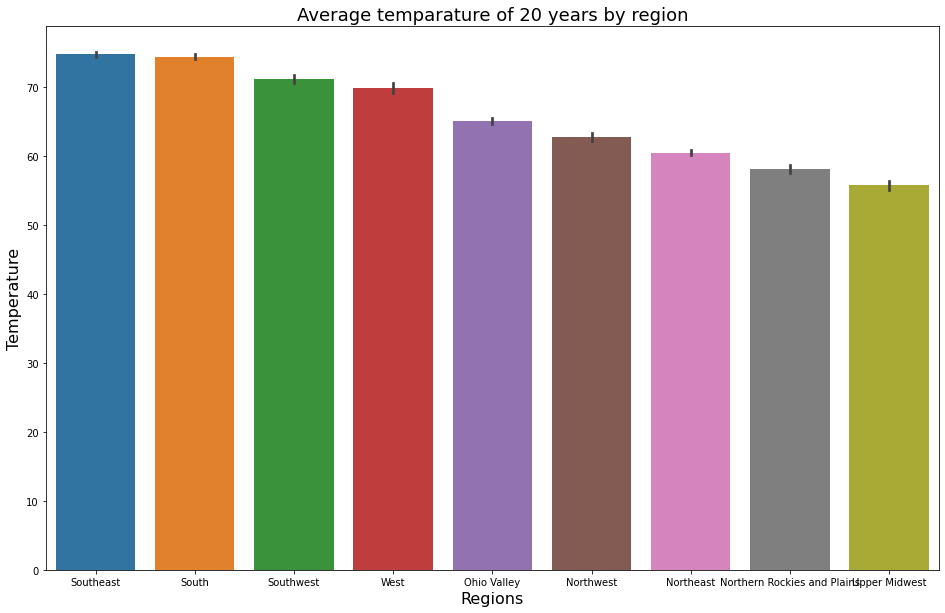

In [171]:
order= data.groupby(data['climate_regions'])['avg_tmax'].mean().sort_values().iloc[::-1].index
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x='climate_regions',
    y='avg_tmax',
    data=data,order=order);
plt.title('Average temparature of 20 years by region',fontdict={'fontsize':18});
plt.xlabel('Regions',fontdict={'fontsize':16});
plt.ylabel('Temperature',fontdict={'fontsize':16});
plt.savefig('../images/Average_temperature_of_20.png')

## graphics of Time serie of the Climate regions 

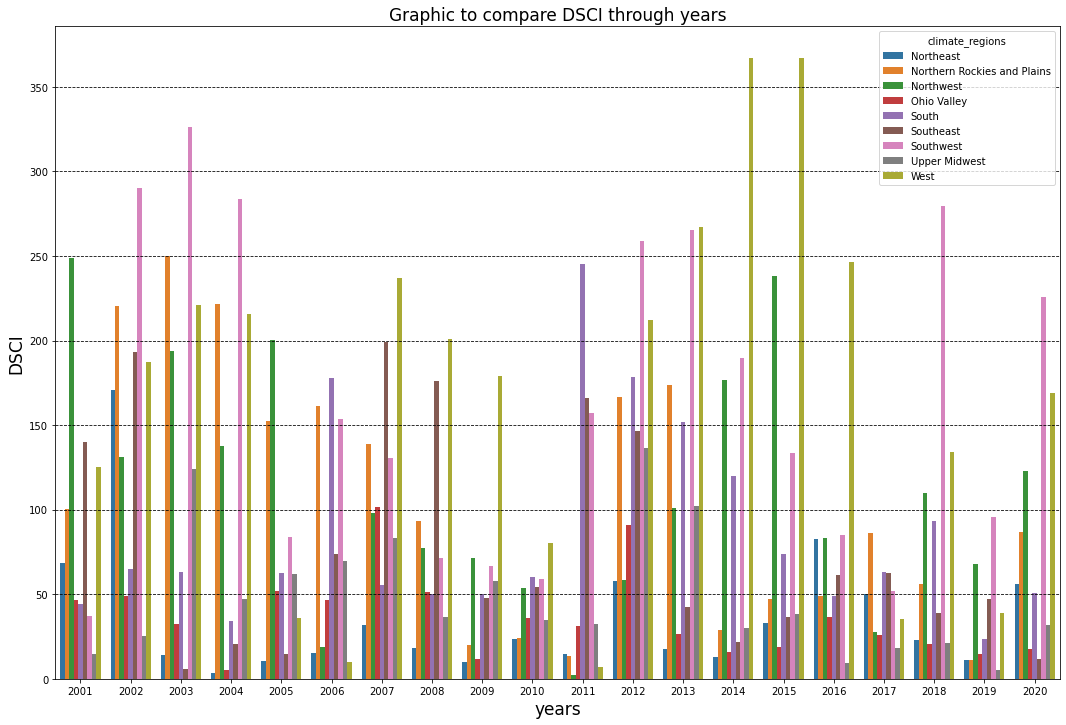

In [172]:

df_regions_years=data.groupby(by=[data['ValidEnd'].dt.year,data['climate_regions']])['DSCI'].agg([ 'mean'])

df_regions_years.reset_index(inplace=True)
#graph the DCSI of the regions
plt.figure(figsize=(18, 12))
sns.barplot(x='ValidEnd',
    y='mean',
    hue='climate_regions',
    data=df_regions_years)
plt.title('Graphic to compare DSCI through years',fontdict={'fontsize':17});
plt.xlabel('years',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.8)
plt.savefig('../images/dsci_regions.png')

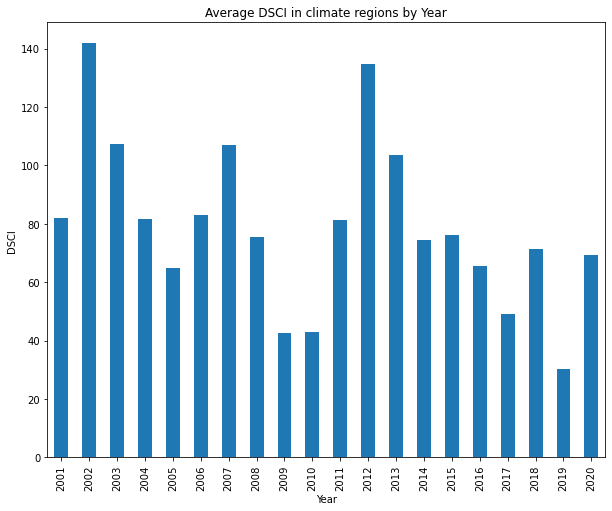

In [173]:
years_DSCI = data.groupby(data['ValidEnd'].dt.year)['DSCI'].mean()
years_DSCI.plot(kind = 'bar', figsize = (10, 8))
plt.xlabel("Year")
plt.ylabel("DSCI")
plt.title(f'Average DSCI in climate regions by Year');
plt.savefig('../images/Average_DSCI_by years.png')

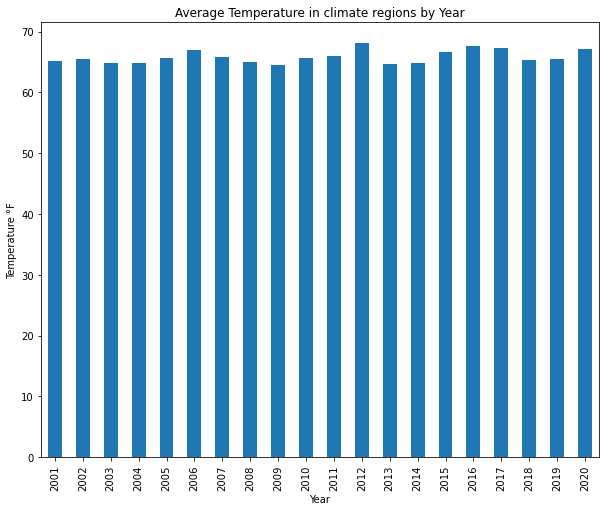

In [174]:
years_temp = data.groupby(data['ValidEnd'].dt.year)['avg_tmax'].mean()
years_temp.plot(kind = 'bar', figsize = (10, 8))
plt.xlabel("Year")
plt.ylabel("Temperature °F")
plt.title(f'Average Temperature in climate regions by Year');
plt.savefig('../images/Average_temp_by_years.png')

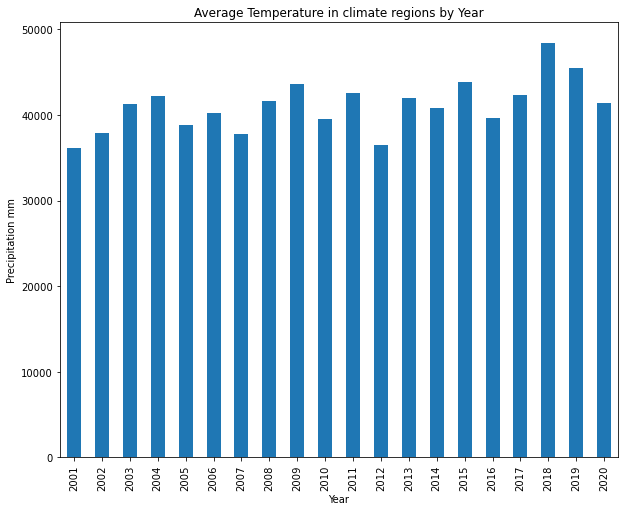

In [175]:
years_temp = data.groupby(data['ValidEnd'].dt.year)['total_avg_prcp_mm'].sum()
years_temp.plot(kind = 'bar', figsize = (10, 8))
plt.xlabel("Year")
plt.ylabel("Precipitation mm")
plt.title(f'Average Temperature in climate regions by Year');
plt.savefig('../images/Average_prec_by_years.png')

In [127]:
southwest=data[data['climate_regions']=='Southwest']
west=data[data['climate_regions']=='West']
south=data[data['climate_regions']=='South']

southwest.set_index('ValidEnd',inplace=True)
west.set_index('ValidEnd',inplace=True)
south.set_index('ValidEnd',inplace=True)

In [135]:
southwest_df=southwest.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

west_df=west.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

south_df=south.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum','avg_tmax':'mean','total_avg_prcp_mm':'sum'})

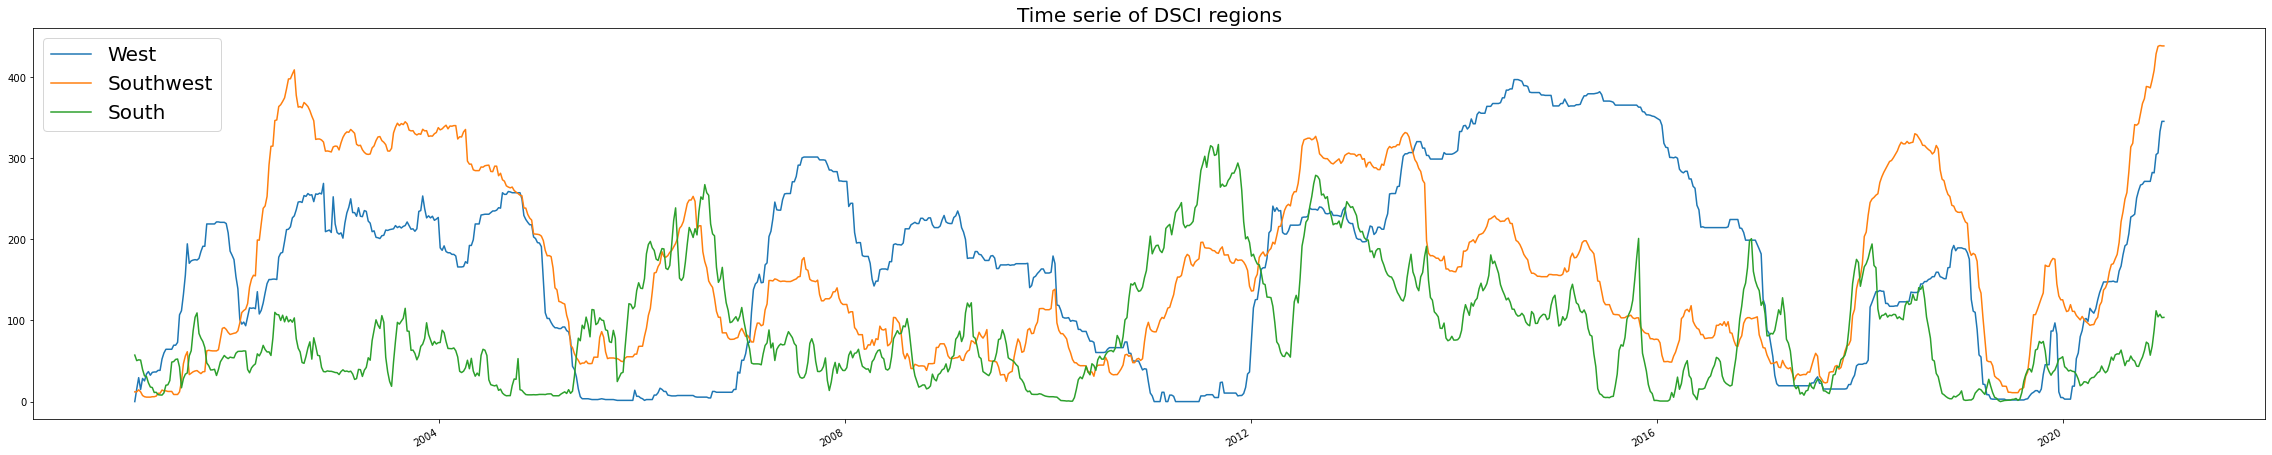

In [176]:
fig, ax = plt.subplots(figsize=(40, 8))

ax.plot(west_df['DSCI'])
ax.plot(southwest_df['DSCI'])
ax.plot(south_df['DSCI'])

plt.title('Time serie of DSCI regions',fontdict={'fontsize':20});
plt.legend(['West','Southwest','South'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('../images/time_serie_3_regions.png')

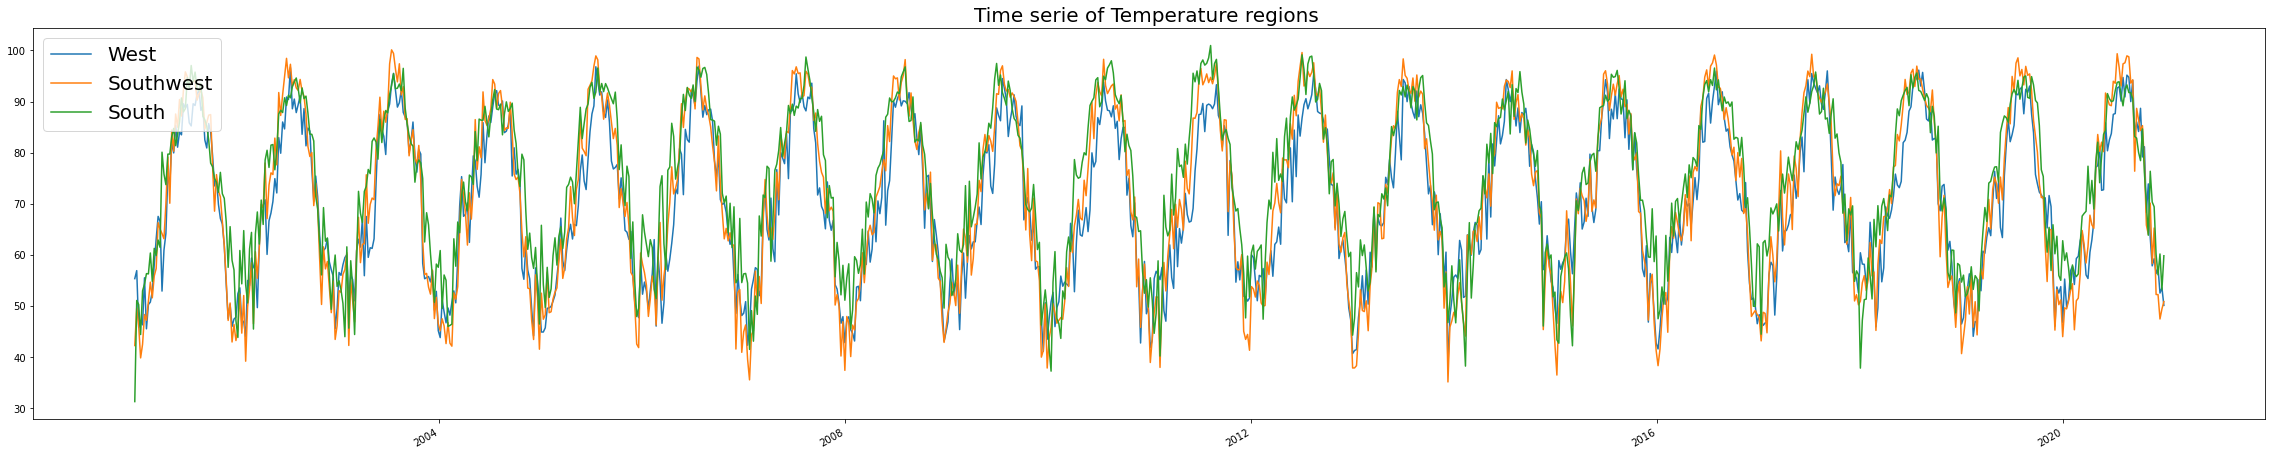

In [178]:
fig, ax = plt.subplots(figsize=(40, 8))

ax.plot(west_df['avg_tmax'])
ax.plot(southwest_df['avg_tmax'])
ax.plot(south_df['avg_tmax'])

plt.title('Time serie of Temperature regions ',fontdict={'fontsize':20});
plt.legend(['West','Southwest','South'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('../images/time_serie_temp_3_regions.png')

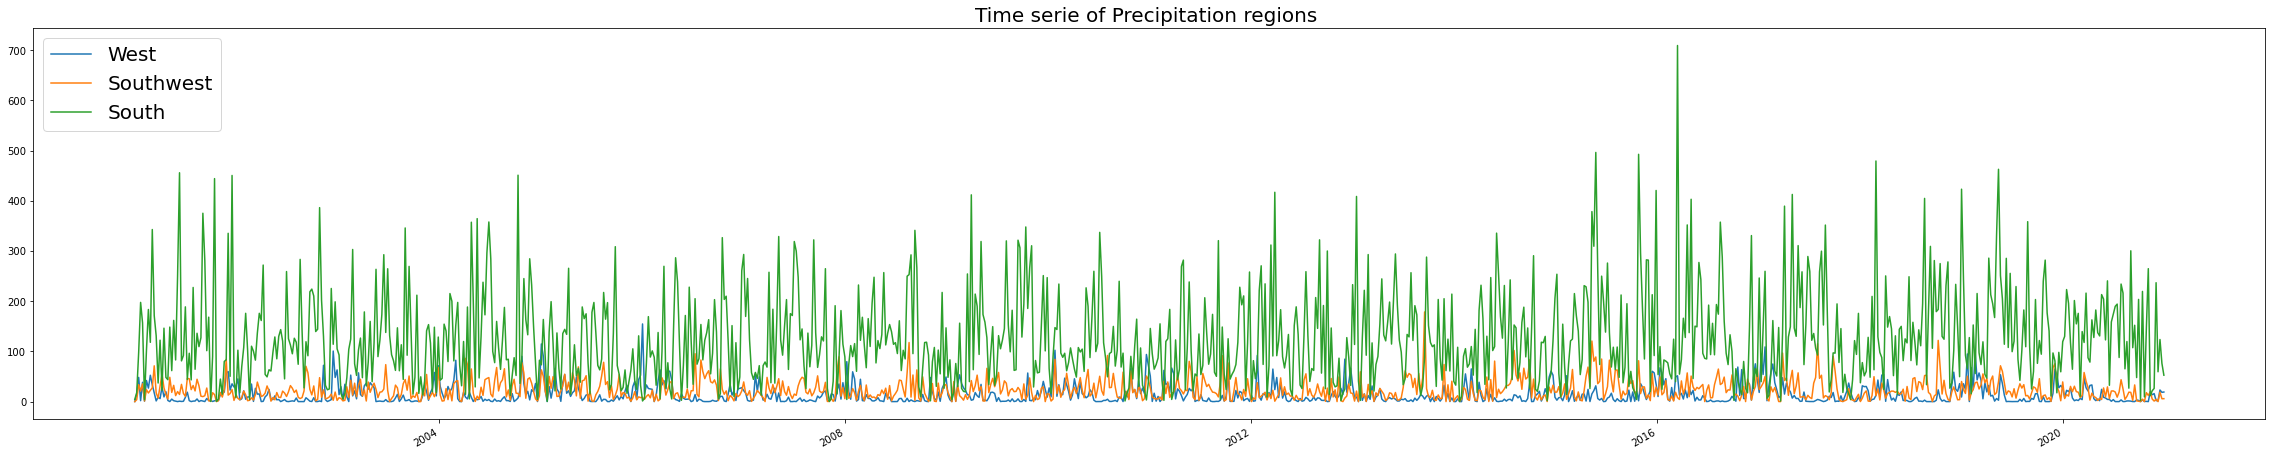

In [179]:
fig, ax = plt.subplots(figsize=(40, 8))

ax.plot(west_df['total_avg_prcp_mm'])
ax.plot(southwest_df['total_avg_prcp_mm'])
ax.plot(south_df['total_avg_prcp_mm'])

plt.title('Time serie of Precipitation regions ',fontdict={'fontsize':20});
plt.legend(['West','Southwest','South'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('../images/time_serie_prep_3_regions.png')